# Face Mask Detection With Yolo

* We need the yolov5 implementation and zero model to do Transfer Learning. Please refer to [this project](https://github.com/rkuo2000/yolov5).
* Dataset can be downloaded in [Kaggle](https://www.kaggle.com/andrewmvd/face-mask-detection)
* We need pytorch and related libraries to do the transfer learning.

## Preparation

In [1]:
!mkdir -p Dataset/FaceMask/Images
!mkdir -p Dataset/FaceMask/Labels

In [2]:
# copy image files
!cp -rf /media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/images/* Dataset/FaceMask/Images

In [3]:
!mkdir -p Dataset/images Dataset/labels

In [4]:
import os
import numpy as np
from pathlib import Path
from xml.dom.minidom import parse
from shutil import copyfile

In [5]:
FILE_ROOT = "/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/"
IMAGE_PATH = FILE_ROOT + "images"  
ANNOTATIONS_PATH = FILE_ROOT + "annotations"

DATA_ROOT = "Dataset/"
LABELS_ROOT = DATA_ROOT + "FaceMask/Labels"
IMAGES_ROOT = DATA_ROOT + "FaceMask/Images"  

DEST_IMAGES_PATH = "images"
DEST_LABELS_PATH = "labels" 

In [6]:
classes = ['with_mask', 'without_mask', 'mask_weared_incorrect']

### convert annotations (from COCO .xml to YOLO format .txt)

In [7]:
def cord_converter(size, box):
    """
    convert xml annotation to darknet format coordinates
    :param size： [w,h]
    :param box: anchor box coordinates [upper-left x,uppler-left y,lower-right x, lower-right y]
    :return: converted [x,y,w,h]
    """
    x1 = int(box[0])
    y1 = int(box[1])
    x2 = int(box[2])
    y2 = int(box[3])

    dw = np.float32(1. / int(size[0]))
    dh = np.float32(1. / int(size[1]))

    w = x2 - x1
    h = y2 - y1
    x = x1 + (w / 2)
    y = y1 + (h / 2)

    x = x * dw
    w = w * dw
    y = y * dh
    h = h * dh
    return [x, y, w, h]

def save_file(img_jpg_file_name, size, img_box):
    save_file_name = LABELS_ROOT + '/' + img_jpg_file_name + '.txt'
    print(save_file_name)
    file_path = open(save_file_name, "a+")
    for box in img_box:

        cls_num = classes.index(box[0])

        new_box = cord_converter(size, box[1:])

        file_path.write(f"{cls_num} {new_box[0]} {new_box[1]} {new_box[2]} {new_box[3]}\n")

    file_path.flush()
    file_path.close()
    
def get_xml_data(file_path, img_xml_file):
    img_path = file_path + '/' + img_xml_file + '.xml'
    print(img_path)

    dom = parse(img_path)
    root = dom.documentElement
    img_name = root.getElementsByTagName("filename")[0].childNodes[0].data
    img_size = root.getElementsByTagName("size")[0]
    objects = root.getElementsByTagName("object")
    img_w = img_size.getElementsByTagName("width")[0].childNodes[0].data
    img_h = img_size.getElementsByTagName("height")[0].childNodes[0].data
    img_c = img_size.getElementsByTagName("depth")[0].childNodes[0].data
    # print("img_name:", img_name)
    # print("image_info:(w,h,c)", img_w, img_h, img_c)
    img_box = []
    for box in objects:
        cls_name = box.getElementsByTagName("name")[0].childNodes[0].data
        x1 = int(box.getElementsByTagName("xmin")[0].childNodes[0].data)
        y1 = int(box.getElementsByTagName("ymin")[0].childNodes[0].data)
        x2 = int(box.getElementsByTagName("xmax")[0].childNodes[0].data)
        y2 = int(box.getElementsByTagName("ymax")[0].childNodes[0].data)
        # print("box:(c,xmin,ymin,xmax,ymax)", cls_name, x1, y1, x2, y2)
        img_jpg_file_name = img_xml_file + '.jpg'
        img_box.append([cls_name, x1, y1, x2, y2])
    # print(img_box)

    # test_dataset_box_feature(img_jpg_file_name, img_box)
    save_file(img_xml_file, [img_w, img_h], img_box)

In [8]:
files = os.listdir(ANNOTATIONS_PATH)
for file in files:
    print("file name: ", file)
    file_xml = file.split(".")
    get_xml_data(ANNOTATIONS_PATH, file_xml[0])

file name:  maksssksksss407.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss407.xml
Dataset/FaceMask/Labels/maksssksksss407.txt
file name:  maksssksksss744.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss744.xml
Dataset/FaceMask/Labels/maksssksksss744.txt
file name:  maksssksksss801.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss801.xml
Dataset/FaceMask/Labels/maksssksksss801.txt
file name:  maksssksksss762.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss762.xml
Dataset/FaceMask/Labels/maksssksksss762.txt
file name:  maksssksksss683.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss683.xml
Dataset/FaceMask/Labels/maksssksksss683.txt
file name:  maksssksksss26.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss26.xml
Dataset/FaceMask/Labels/maksssksksss26.txt
file name:  maksssksksss456.xml
/media/comm

file name:  maksssksksss469.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss469.xml
Dataset/FaceMask/Labels/maksssksksss469.txt
file name:  maksssksksss461.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss461.xml
Dataset/FaceMask/Labels/maksssksksss461.txt
file name:  maksssksksss357.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss357.xml
Dataset/FaceMask/Labels/maksssksksss357.txt
file name:  maksssksksss32.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss32.xml
Dataset/FaceMask/Labels/maksssksksss32.txt
file name:  maksssksksss235.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss235.xml
Dataset/FaceMask/Labels/maksssksksss235.txt
file name:  maksssksksss417.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss417.xml
Dataset/FaceMask/Labels/maksssksksss417.txt
file name:  maksssksksss793.xml
/media/comm

Dataset/FaceMask/Labels/maksssksksss549.txt
file name:  maksssksksss768.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss768.xml
Dataset/FaceMask/Labels/maksssksksss768.txt
file name:  maksssksksss278.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss278.xml
Dataset/FaceMask/Labels/maksssksksss278.txt
file name:  maksssksksss819.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss819.xml
Dataset/FaceMask/Labels/maksssksksss819.txt
file name:  maksssksksss43.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss43.xml
Dataset/FaceMask/Labels/maksssksksss43.txt
file name:  maksssksksss333.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss333.xml
Dataset/FaceMask/Labels/maksssksksss333.txt
file name:  maksssksksss531.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss531.xml
Dataset/FaceMask/Labels/maksssksksss531.txt

file name:  maksssksksss365.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss365.xml
Dataset/FaceMask/Labels/maksssksksss365.txt
file name:  maksssksksss401.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss401.xml
Dataset/FaceMask/Labels/maksssksksss401.txt
file name:  maksssksksss520.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss520.xml
Dataset/FaceMask/Labels/maksssksksss520.txt
file name:  maksssksksss173.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss173.xml
Dataset/FaceMask/Labels/maksssksksss173.txt
file name:  maksssksksss396.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss396.xml
Dataset/FaceMask/Labels/maksssksksss396.txt
file name:  maksssksksss243.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss243.xml
Dataset/FaceMask/Labels/maksssksksss243.txt
file name:  maksssksksss52.xml
/media/co

file name:  maksssksksss388.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss388.xml
Dataset/FaceMask/Labels/maksssksksss388.txt
file name:  maksssksksss260.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss260.xml
Dataset/FaceMask/Labels/maksssksksss260.txt
file name:  maksssksksss315.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss315.xml
Dataset/FaceMask/Labels/maksssksksss315.txt
file name:  maksssksksss737.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss737.xml
Dataset/FaceMask/Labels/maksssksksss737.txt
file name:  maksssksksss657.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss657.xml
Dataset/FaceMask/Labels/maksssksksss657.txt
file name:  maksssksksss441.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss441.xml
Dataset/FaceMask/Labels/maksssksksss441.txt
file name:  maksssksksss809.xml
/media/c

Dataset/FaceMask/Labels/maksssksksss522.txt
file name:  maksssksksss638.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss638.xml
Dataset/FaceMask/Labels/maksssksksss638.txt
file name:  maksssksksss631.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss631.xml
Dataset/FaceMask/Labels/maksssksksss631.txt
file name:  maksssksksss7.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss7.xml
Dataset/FaceMask/Labels/maksssksksss7.txt
file name:  maksssksksss123.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss123.xml
Dataset/FaceMask/Labels/maksssksksss123.txt
file name:  maksssksksss804.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss804.xml
Dataset/FaceMask/Labels/maksssksksss804.txt
file name:  maksssksksss231.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss231.xml
Dataset/FaceMask/Labels/maksssksksss231.txt
fi

Dataset/FaceMask/Labels/maksssksksss584.txt
file name:  maksssksksss776.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss776.xml
Dataset/FaceMask/Labels/maksssksksss776.txt
file name:  maksssksksss703.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss703.xml
Dataset/FaceMask/Labels/maksssksksss703.txt
file name:  maksssksksss147.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss147.xml
Dataset/FaceMask/Labels/maksssksksss147.txt
file name:  maksssksksss831.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss831.xml
Dataset/FaceMask/Labels/maksssksksss831.txt
file name:  maksssksksss108.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss108.xml
Dataset/FaceMask/Labels/maksssksksss108.txt
file name:  maksssksksss112.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss112.xml
Dataset/FaceMask/Labels/maksssksksss112.

file name:  maksssksksss794.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss794.xml
Dataset/FaceMask/Labels/maksssksksss794.txt
file name:  maksssksksss710.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss710.xml
Dataset/FaceMask/Labels/maksssksksss710.txt
file name:  maksssksksss367.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss367.xml
Dataset/FaceMask/Labels/maksssksksss367.txt
file name:  maksssksksss245.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss245.xml
Dataset/FaceMask/Labels/maksssksksss245.txt
file name:  maksssksksss101.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss101.xml
Dataset/FaceMask/Labels/maksssksksss101.txt
file name:  maksssksksss319.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss319.xml
Dataset/FaceMask/Labels/maksssksksss319.txt
file name:  maksssksksss356.xml
/media/c

file name:  maksssksksss362.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss362.xml
Dataset/FaceMask/Labels/maksssksksss362.txt
file name:  maksssksksss484.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss484.xml
Dataset/FaceMask/Labels/maksssksksss484.txt
file name:  maksssksksss414.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss414.xml
Dataset/FaceMask/Labels/maksssksksss414.txt
file name:  maksssksksss595.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss595.xml
Dataset/FaceMask/Labels/maksssksksss595.txt
file name:  maksssksksss585.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss585.xml
Dataset/FaceMask/Labels/maksssksksss585.txt
file name:  maksssksksss527.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss527.xml
Dataset/FaceMask/Labels/maksssksksss527.txt
file name:  maksssksksss485.xml
/media/c

Dataset/FaceMask/Labels/maksssksksss199.txt
file name:  maksssksksss76.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss76.xml
Dataset/FaceMask/Labels/maksssksksss76.txt
file name:  maksssksksss299.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss299.xml
Dataset/FaceMask/Labels/maksssksksss299.txt
file name:  maksssksksss604.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss604.xml
Dataset/FaceMask/Labels/maksssksksss604.txt
file name:  maksssksksss411.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss411.xml
Dataset/FaceMask/Labels/maksssksksss411.txt
file name:  maksssksksss355.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss355.xml
Dataset/FaceMask/Labels/maksssksksss355.txt
file name:  maksssksksss57.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss57.xml
Dataset/FaceMask/Labels/maksssksksss57.txt
fi

Dataset/FaceMask/Labels/maksssksksss313.txt
file name:  maksssksksss239.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss239.xml
Dataset/FaceMask/Labels/maksssksksss239.txt
file name:  maksssksksss377.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss377.xml
Dataset/FaceMask/Labels/maksssksksss377.txt
file name:  maksssksksss539.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss539.xml
Dataset/FaceMask/Labels/maksssksksss539.txt
file name:  maksssksksss805.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss805.xml
Dataset/FaceMask/Labels/maksssksksss805.txt
file name:  maksssksksss131.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss131.xml
Dataset/FaceMask/Labels/maksssksksss131.txt
file name:  maksssksksss364.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss364.xml
Dataset/FaceMask/Labels/maksssksksss364.

Dataset/FaceMask/Labels/maksssksksss13.txt
file name:  maksssksksss445.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss445.xml
Dataset/FaceMask/Labels/maksssksksss445.txt
file name:  maksssksksss3.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss3.xml
Dataset/FaceMask/Labels/maksssksksss3.txt
file name:  maksssksksss138.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss138.xml
Dataset/FaceMask/Labels/maksssksksss138.txt
file name:  maksssksksss149.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss149.xml
Dataset/FaceMask/Labels/maksssksksss149.txt
file name:  maksssksksss62.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss62.xml
Dataset/FaceMask/Labels/maksssksksss62.txt
file name:  maksssksksss850.xml
/media/commlab/TenTB/home/jan/DATA/kaggle/face-mask/annotations/maksssksksss850.xml
Dataset/FaceMask/Labels/maksssksksss850.txt
file n

## Split Into Train Val and Test set

In [9]:
from sklearn.model_selection import train_test_split
image_list = os.listdir('Dataset/FaceMask/Images')
train_list, test_list = train_test_split(image_list, test_size=0.2, random_state=7)
val_list, test_list = train_test_split(test_list, test_size=0.5, random_state=8)

print('total =',len(image_list))
print('train :',len(train_list))
print('val   :',len(val_list))
print('test  :',len(test_list))

total = 853
train : 682
val   : 85
test  : 86


In [10]:
def copy_data(file_list, img_labels_root, imgs_source, type):

    root_file = Path(DATA_ROOT + DEST_IMAGES_PATH + '/' + type)
    if not root_file.exists():
        print(f"Path {root_file} is not exit")
        os.makedirs(root_file)

    root_file = Path(DATA_ROOT + DEST_LABELS_PATH + '/' + type)
    if not root_file.exists():
        print(f"Path {root_file} is not exit")
        os.makedirs(root_file)

    for file in file_list:
        img_name = file.replace('.png', '')
        img_src_file = imgs_source + '/' + img_name + '.png'
        label_src_file = img_labels_root + '/' + img_name + '.txt'

        # print(img_sor_file)
        # print(label_sor_file)
        # im = Image.open(rf"{img_sor_file}")
        # im.show()

        # Copy image
        DICT_DIR = DATA_ROOT + DEST_IMAGES_PATH + '/' + type
        img_dict_file = DICT_DIR + '/' + img_name + '.png'

        copyfile(img_src_file, img_dict_file)

        # Copy label
        DICT_DIR = DATA_ROOT + DEST_LABELS_PATH + '/' + type
        img_dict_file = DICT_DIR + '/' + img_name + '.txt'
        copyfile(label_src_file, img_dict_file)

In [11]:
copy_data(train_list, LABELS_ROOT, IMAGES_ROOT, "train")
copy_data(val_list,   LABELS_ROOT, IMAGES_ROOT, "val")
copy_data(test_list,  LABELS_ROOT, IMAGES_ROOT, "test")

Path Dataset/images/train is not exit
Path Dataset/labels/train is not exit
Path Dataset/images/val is not exit
Path Dataset/labels/val is not exit
Path Dataset/images/test is not exit
Path Dataset/labels/test is not exit


## Create data/facemask.yaml

Please read the original github project how to do transfer learning on Yolov5

In [12]:
!echo "train: Dataset/images/train" >> data/facemask.yaml
!echo "val:   Dataset/images/val" >> data/facemask.yaml
!echo "nc : 3" >> data/facemask.yaml
!echo "names: ['With_Mask', 'Without_Mask', 'Incorrect_Mask']" >> data/facemask.yaml

!cat data/facemask.yaml

train: Dataset/images/train
val:   Dataset/images/val
nc : 3
names: ['With_Mask', 'Without_Mask', 'Incorrect_Mask']
train: Dataset/images/train
val:   Dataset/images/val
nc : 3
names: ['With_Mask', 'Without_Mask', 'Incorrect_Mask']


## Train YOLOv5

In [15]:
!python train.py --img 320 --batch 42 --epochs 30 --data data/facemask.yaml --cfg models/yolov5s.yaml --weights yolov5s.pt

Using torch 1.7.1+cu101 CUDA:0 (GeForce RTX 2080 Ti, 11019MB)
                        CUDA:1 (GeForce RTX 2080 Ti, 11019MB)
                        CUDA:2 (GeForce RTX 2080 Ti, 11019MB)
                        CUDA:3 (GeForce RTX 2080 Ti, 11019MB)
                        CUDA:4 (GeForce RTX 2080 Ti, 11019MB)
                        CUDA:5 (GeForce RTX 2080 Ti, 11019MB)
                        CUDA:6 (GeForce RTX 2080 Ti, 11019MB)

Namespace(adam=False, batch_size=42, bucket='', cache_images=False, cfg='models/yolov5s.yaml', data='data/facemask.yaml', device='', epochs=30, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[320, 320], local_rank=-1, log_artifacts=False, log_imgs=16, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', rect=False, resume=False, save_dir='runs/train/exp17', single_cls=False, sync_bn=False, total_batch_size=42, weights='yolov5s.pt', workers=8, world_size=1

### Take the best model and copy

In [18]:
# save trained weights for detection
!cp runs/train/exp17/weights/best.pt weights

## Test YOLOv5

### detect facemask

In [19]:
!python detect.py --source Dataset/images/test --img-size 320 --conf 0.4 --weights weights/best.pt 

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=320, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='Dataset/images/test', update=False, view_img=False, weights=['weights/best.pt'])
Using torch 1.7.1+cu101 CUDA:0 (GeForce RTX 2080 Ti, 11019MB)
                        CUDA:1 (GeForce RTX 2080 Ti, 11019MB)
                        CUDA:2 (GeForce RTX 2080 Ti, 11019MB)
                        CUDA:3 (GeForce RTX 2080 Ti, 11019MB)
                        CUDA:4 (GeForce RTX 2080 Ti, 11019MB)
                        CUDA:5 (GeForce RTX 2080 Ti, 11019MB)
                        CUDA:6 (GeForce RTX 2080 Ti, 11019MB)

Fusing layers... 
Model Summary: 232 layers, 7251912 parameters, 0 gradients
image 1/86 /media/commlab/TenTB/home/jan/kaggle/facemask-yolo/Dataset/images/test/maksssksksss110.png: 224x320 12 With_Masks, 12 Without_Masks, Done. (0.011s)
image 2/86 /media/commlab/TenTB/home/jan

image 53/86 /media/commlab/TenTB/home/jan/kaggle/facemask-yolo/Dataset/images/test/maksssksksss559.png: 224x320 13 With_Masks, 3 Without_Masks, Done. (0.008s)
image 54/86 /media/commlab/TenTB/home/jan/kaggle/facemask-yolo/Dataset/images/test/maksssksksss569.png: 192x320 1 With_Masks, Done. (0.008s)
image 55/86 /media/commlab/TenTB/home/jan/kaggle/facemask-yolo/Dataset/images/test/maksssksksss586.png: 224x320 2 With_Masks, Done. (0.008s)
image 56/86 /media/commlab/TenTB/home/jan/kaggle/facemask-yolo/Dataset/images/test/maksssksksss597.png: 224x320 2 With_Masks, Done. (0.008s)
image 57/86 /media/commlab/TenTB/home/jan/kaggle/facemask-yolo/Dataset/images/test/maksssksksss598.png: 320x256 1 With_Masks, Done. (0.009s)
image 58/86 /media/commlab/TenTB/home/jan/kaggle/facemask-yolo/Dataset/images/test/maksssksksss610.png: 192x320 3 With_Masks, Done. (0.008s)
image 59/86 /media/commlab/TenTB/home/jan/kaggle/facemask-yolo/Dataset/images/test/maksssksksss62.png: 320x256 1 With_Masks, Done. (0.00

In [20]:
# display detected images
from IPython.display import Image

<function matplotlib.pyplot.show(close=None, block=None)>

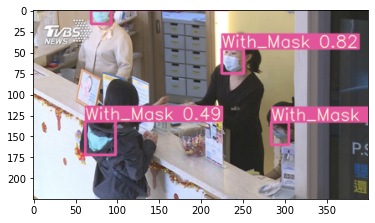

In [10]:
from glob import glob
import matplotlib.pyplot as plt
testfiles = glob('runs/detect/exp5/*')

img = plt.imread(testfiles[8]) 
plt.imshow(img)    
plt.show

## Test for arbitrary image from internet

In [25]:
!python detect.py --source 1200x800.jpg --img-size 320 --conf 0.4 --weights weights/best.pt 

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=320, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='1200x800.jpg', update=False, view_img=False, weights=['weights/best.pt'])
Using torch 1.7.1+cu101 CUDA:0 (GeForce RTX 2080 Ti, 11019MB)
                        CUDA:1 (GeForce RTX 2080 Ti, 11019MB)
                        CUDA:2 (GeForce RTX 2080 Ti, 11019MB)
                        CUDA:3 (GeForce RTX 2080 Ti, 11019MB)
                        CUDA:4 (GeForce RTX 2080 Ti, 11019MB)
                        CUDA:5 (GeForce RTX 2080 Ti, 11019MB)
                        CUDA:6 (GeForce RTX 2080 Ti, 11019MB)

Fusing layers... 
Model Summary: 232 layers, 7251912 parameters, 0 gradients
image 1/1 /media/commlab/TenTB/home/jan/kaggle/facemask-yolo/1200x800.jpg: 224x320 3 With_Masks, Done. (0.010s)
Results saved to runs/detect/exp7
Done. (0.066s)


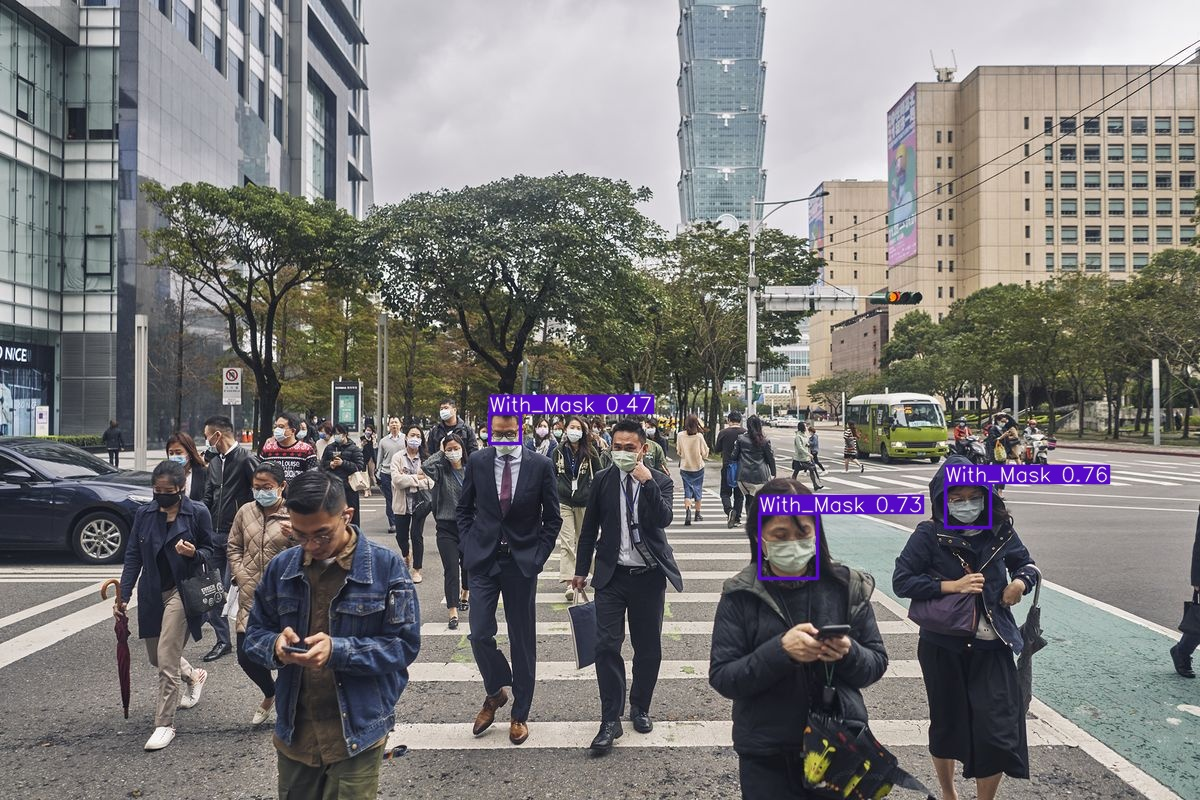

In [26]:
Image('runs/detect/exp7/1200x800.jpg')

In [27]:
!python detect.py --source a_coronavirus-taiwan-02062020-1.jpg --img-size 320 --conf 0.4 --weights weights/best.pt 

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=320, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='a_coronavirus-taiwan-02062020-1.jpg', update=False, view_img=False, weights=['weights/best.pt'])
Using torch 1.7.1+cu101 CUDA:0 (GeForce RTX 2080 Ti, 11019MB)
                        CUDA:1 (GeForce RTX 2080 Ti, 11019MB)
                        CUDA:2 (GeForce RTX 2080 Ti, 11019MB)
                        CUDA:3 (GeForce RTX 2080 Ti, 11019MB)
                        CUDA:4 (GeForce RTX 2080 Ti, 11019MB)
                        CUDA:5 (GeForce RTX 2080 Ti, 11019MB)
                        CUDA:6 (GeForce RTX 2080 Ti, 11019MB)

Fusing layers... 
Model Summary: 232 layers, 7251912 parameters, 0 gradients
image 1/1 /media/commlab/TenTB/home/jan/kaggle/facemask-yolo/a_coronavirus-taiwan-02062020-1.jpg: 224x320 11 With_Masks, 1 Without_Masks, Done. (0.010s)
Results saved to runs/detect/e

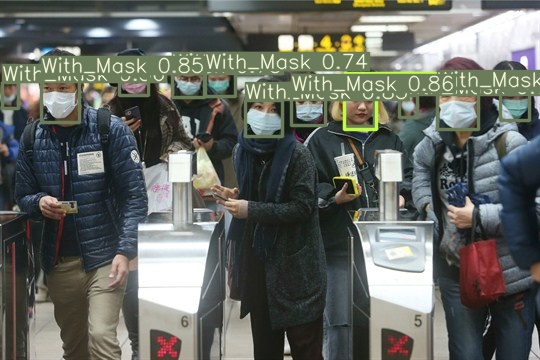

In [28]:
Image('runs/detect/exp8/a_coronavirus-taiwan-02062020-1.jpg')

In [29]:
!python detect.py --source aneua2_1579932400.jpg --img-size 320 --conf 0.4 --weights weights/best.pt 

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=320, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='aneua2_1579932400.jpg', update=False, view_img=False, weights=['weights/best.pt'])
Using torch 1.7.1+cu101 CUDA:0 (GeForce RTX 2080 Ti, 11019MB)
                        CUDA:1 (GeForce RTX 2080 Ti, 11019MB)
                        CUDA:2 (GeForce RTX 2080 Ti, 11019MB)
                        CUDA:3 (GeForce RTX 2080 Ti, 11019MB)
                        CUDA:4 (GeForce RTX 2080 Ti, 11019MB)
                        CUDA:5 (GeForce RTX 2080 Ti, 11019MB)
                        CUDA:6 (GeForce RTX 2080 Ti, 11019MB)

Fusing layers... 
Model Summary: 232 layers, 7251912 parameters, 0 gradients
image 1/1 /media/commlab/TenTB/home/jan/kaggle/facemask-yolo/aneua2_1579932400.jpg: 224x320 5 With_Masks, 1 Without_Masks, Done. (0.010s)
Results saved to runs/detect/exp9
Done. (0.049s)


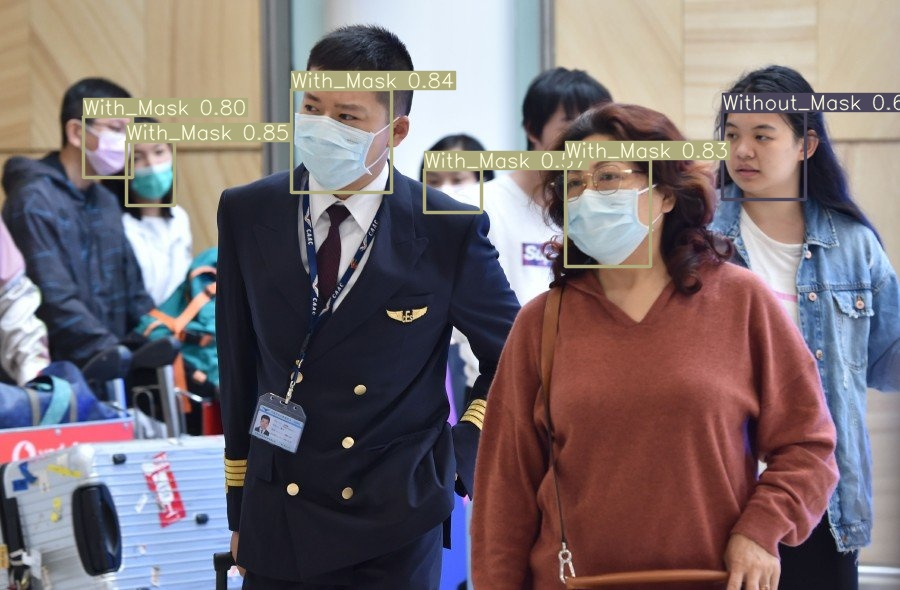

In [30]:
Image('runs/detect/exp9/aneua2_1579932400.jpg')

In [31]:
!python detect.py --source 1580426169277.jpg --img-size 320 --conf 0.4 --weights weights/best.pt 

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=320, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='1580426169277.jpg', update=False, view_img=False, weights=['weights/best.pt'])
Using torch 1.7.1+cu101 CUDA:0 (GeForce RTX 2080 Ti, 11019MB)
                        CUDA:1 (GeForce RTX 2080 Ti, 11019MB)
                        CUDA:2 (GeForce RTX 2080 Ti, 11019MB)
                        CUDA:3 (GeForce RTX 2080 Ti, 11019MB)
                        CUDA:4 (GeForce RTX 2080 Ti, 11019MB)
                        CUDA:5 (GeForce RTX 2080 Ti, 11019MB)
                        CUDA:6 (GeForce RTX 2080 Ti, 11019MB)

Fusing layers... 
Model Summary: 232 layers, 7251912 parameters, 0 gradients
image 1/1 /media/commlab/TenTB/home/jan/kaggle/facemask-yolo/1580426169277.jpg: 192x320 3 With_Masks, Done. (0.010s)
Results saved to runs/detect/exp10
Done. (0.034s)


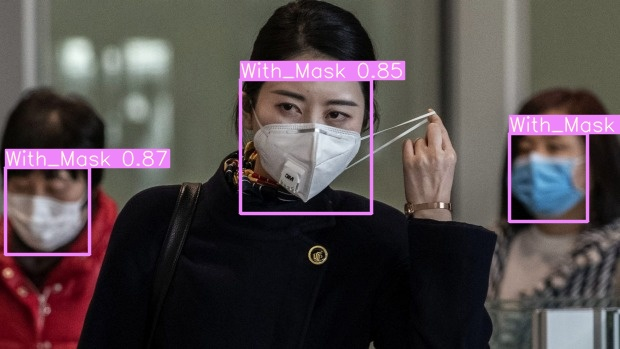

In [32]:
Image('runs/detect/exp10/1580426169277.jpg')

In [33]:
!python detect.py --source F0x0.jpg --img-size 320 --conf 0.4 --weights weights/best.pt 

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=320, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='F0x0.jpg', update=False, view_img=False, weights=['weights/best.pt'])
Using torch 1.7.1+cu101 CUDA:0 (GeForce RTX 2080 Ti, 11019MB)
                        CUDA:1 (GeForce RTX 2080 Ti, 11019MB)
                        CUDA:2 (GeForce RTX 2080 Ti, 11019MB)
                        CUDA:3 (GeForce RTX 2080 Ti, 11019MB)
                        CUDA:4 (GeForce RTX 2080 Ti, 11019MB)
                        CUDA:5 (GeForce RTX 2080 Ti, 11019MB)
                        CUDA:6 (GeForce RTX 2080 Ti, 11019MB)

Fusing layers... 
Model Summary: 232 layers, 7251912 parameters, 0 gradients
image 1/1 /media/commlab/TenTB/home/jan/kaggle/facemask-yolo/F0x0.jpg: 224x320 5 With_Masks, 1 Without_Masks, Done. (0.011s)
Results saved to runs/detect/exp11
Done. (0.060s)


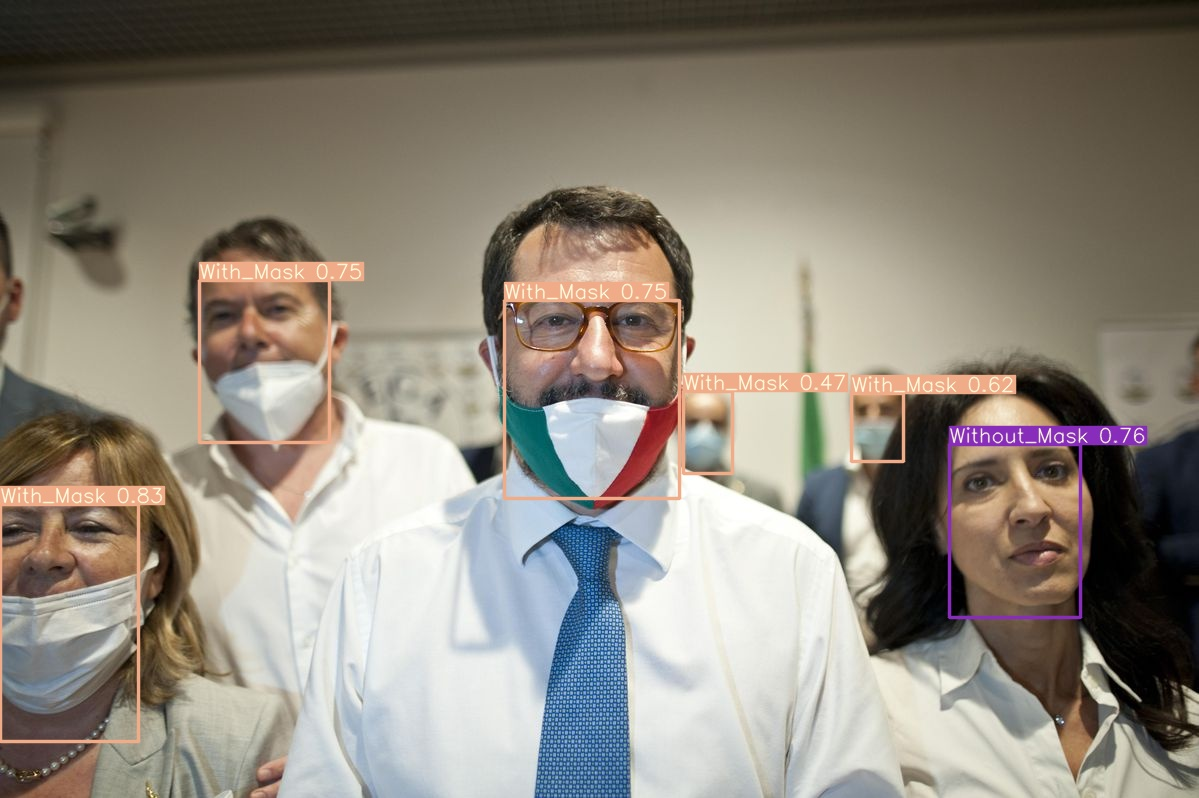

In [34]:
Image('runs/detect/exp11/F0x0.jpg')